In [ ]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

**Yêu cầu 1:** Nhập dữ liệu đầu vào và cho biết số lượng dữ liệu huấn luyện (tương ứng với file
adult.data.csv) và số lượng dữ liệu kiểm thử (tương ứng với file adult.test.csv)

In [ ]:
print("Huỳnh Thị Trúc Lam - 6351071040")

# Đọc dữ liệu
train_df = pd.read_csv("/content/adult.data.csv")
test_df = pd.read_csv("/content/adult.test.csv")

# In số lượng dòng
print("Số dòng dữ liệu huấn luyện:", train_df.shape[0])
print("Số dòng dữ liệu kiểm thử:", test_df.shape[0])

Huỳnh Thị Trúc Lam - 6351071040
Số dòng dữ liệu huấn luyện: 32561
Số dòng dữ liệu kiểm thử: 16281


**Yêu cầu 2: Tiền xử lý dữ liệu**

- Xóa những dòng có chứa dữ liệu trống, biết rằng dữ liệu trống được ký hiệu bằng dấu ‘?’.
- Xóa cột final weight ‘fnlwgt’ trong dữ liệu huấn luyện vì cột này không có trong dữ liệu kiểm thử.
- Nối dữ liệu huấn luyện và kiểm thử lại với nhau để phục vụ các bước tiếp theo.

In [ ]:
# Xoá dòng data trống
test_df = test_df.map(lambda x: x.strip() if isinstance(x, str) else x)
train_df = train_df.map(lambda x: x.strip() if isinstance(x, str) else x)

test_mask = test_df.isin(['?'])
train_mask = train_df.isin(['?'])

clean_train = train_df[ ~train_mask.any(axis=1) ]
clean_test  = test_df[ ~test_mask.any(axis=1) ]

print("Huỳnh Thị Trúc Lam - 6351071040")
print("Số dòng dữ liệu huấn luyện sau làm sạch:", len(clean_train))
print("Số dòng dữ liệu test sau làm sạch:", len(clean_test))

Huỳnh Thị Trúc Lam - 6351071040
Số dòng dữ liệu huấn luyện sau làm sạch: 30162
Số dòng dữ liệu test sau làm sạch: 15060


In [ ]:
# Xóa cột final weight ‘fnlwgt’ trong dữ liệu huấn luyện
clean_train = train_df.drop(columns=[ "fnlwgt" ])
clean_train.info()
print("Huỳnh Thị Trúc Lam - 6351071040")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB
Huỳnh Thị Trúc Lam - 6351071040


In [ ]:
# Nối dữ liệu huấn luyện và kiểm thử lại với nhau
combined_data = pd.concat([clean_train, clean_test], axis=0, ignore_index=True)
combined_data.info()
print("Huỳnh Thị Trúc Lam - 6351071040")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47621 entries, 0 to 47620
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             47621 non-null  int64 
 1   workclass       47621 non-null  object
 2   education       47621 non-null  object
 3   education-num   47621 non-null  int64 
 4   marital-status  47621 non-null  object
 5   occupation      47621 non-null  object
 6   relationship    47621 non-null  object
 7   race            47621 non-null  object
 8   sex             47621 non-null  object
 9   capital-gain    47621 non-null  int64 
 10  capital-loss    47621 non-null  int64 
 11  hours-per-week  47621 non-null  int64 
 12  native-country  47621 non-null  object
 13  income          47621 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.1+ MB
Huỳnh Thị Trúc Lam - 6351071040


**Yêu cầu 3:** Khảo sát độ tương đồng giữa các cột với nhau bằng công thức Pearson. Những cột nào có giá trị tương đồng cao thì hãy loại bỏ.

In [ ]:
# Chọn các cột số
numeric_df = combined_data.select_dtypes(include=["int64", "float64"])

# Tính ma trận tương quan Pearson
corr_matrix = numeric_df.corr(method="pearson")

print("=== MA TRẬN TƯƠNG QUAN PEARSON ===")
print(corr_matrix)

# Tìm các cặp cột có tương quan cao
threshold = 0.8
high_corr_pairs = []

for i in corr_matrix.columns:
    for j in corr_matrix.columns:
        if i != j and abs(corr_matrix.loc[i, j]) > threshold:
            pair = tuple(sorted([i, j]))
            high_corr_pairs.append((pair[0], pair[1], corr_matrix.loc[i, j]))

# Loại trùng lặp
high_corr_pairs = list(set(high_corr_pairs))

if len(high_corr_pairs) == 0:
    print("\nKhông có cặp cột nào có tương quan lớn hơn 0.8")
else:
    print("\n=== CÁC CẶP CỘT CÓ TƯƠNG QUAN CAO (>|0.8|) ===")
    for c1, c2, val in high_corr_pairs:
        print(f"{c1}  <-->  {c2}   :  {val:.3f}")

print("\nHuỳnh Thị Trúc Lam - 6351071040")

=== MA TRẬN TƯƠNG QUAN PEARSON ===
                     age  education-num  capital-gain  capital-loss  \
age             1.000000       0.036527      0.077674      0.057775   
education-num   0.036527       1.000000      0.122630      0.079923   
capital-gain    0.077674       0.122630      1.000000     -0.031615   
capital-loss    0.057775       0.079923     -0.031615      1.000000   
hours-per-week  0.068756       0.148123      0.078409      0.054256   

                hours-per-week  
age                   0.068756  
education-num         0.148123  
capital-gain          0.078409  
capital-loss          0.054256  
hours-per-week        1.000000  

Không có cặp cột nào có tương quan lớn hơn 0.8

Huỳnh Thị Trúc Lam - 6351071040


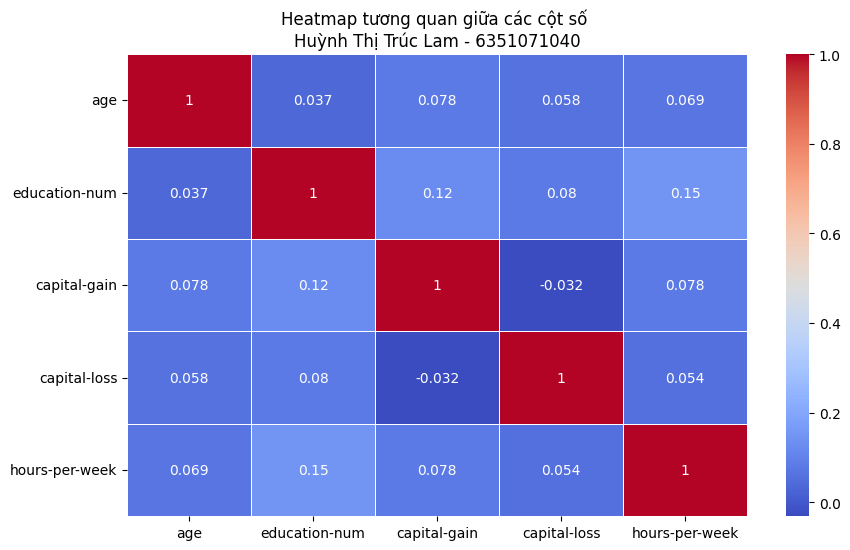

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap tương quan giữa các cột số \nHuỳnh Thị Trúc Lam - 6351071040")
plt.show()


**Yêu cầu 4:** Tách các cột dữ liệu thành hai phần, một phần chứa các thuộc tính bình thường, một phần chứa riêng thuộc tính quyết định.

In [ ]:
fearures = combined_data.drop(columns=["income"], axis=1)
labels = combined_data["income"]
print("\nHuỳnh Thị Trúc Lam - 6351071040")


Huỳnh Thị Trúc Lam - 6351071040


**Yêu cầu 5:** Chuyển đổi các cột không phải dạng số về dạng one-hot vector để phù hợp với đầu vào của thư viện.

In [ ]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")
fearures_onehot=pd.get_dummies(
    fearures,
    columns=fearures.select_dtypes(exclude=["int64", "float64"]).columns,
    drop_first=True   # tránh đa cộng tuyến
)

fearures_onehot


Huỳnh Thị Trúc Lam - 6351071040


,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47616,33,13,0,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
47617,39,13,0,0,36,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
47618,38,13,0,0,50,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
47619,44,13,5455,0,40,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


**Yêu cầu 6:** Tách các dòng dữ liệu ra thành hai phần huấn luyện và kiểm thử như ban đầu.

In [ ]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")
X_train= fearures_onehot[:30162]
X_test= fearures_onehot[30162:]
y_train=labels[:30162]
y_test=labels[30162:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


Huỳnh Thị Trúc Lam - 6351071040
(30162, 99)
(17459, 99)
(30162,)
(17459,)


**Yêu cầu 7:** Xây dựng cây ID3 dựa trên dữ liệu huấn luyện và sau đó tiến hành kiểm thử kết quả của cây bằng ma trận nhầm lẫn. Biểu diễn cây vào trong kết quả thực hiện.

In [ ]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")
# Tạo model ID3
model = DecisionTreeClassifier(criterion='entropy')

# Huấn luyện
model.fit(X_train, y_train)

# Dự đoán trên test
y_pred = model.predict(X_test)

# Độ chính xác
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Report:", classification_report(y_test, y_pred))


Huỳnh Thị Trúc Lam - 6351071040
Accuracy: 0.8144796380090498
Report:               precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     13155
        >50K       0.63      0.60      0.61      4304

    accuracy                           0.81     17459
   macro avg       0.75      0.74      0.75     17459
weighted avg       0.81      0.81      0.81     17459



In [ ]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[11634  1521]
 [ 1718  2586]]


**Biểu diễn cây ID3**

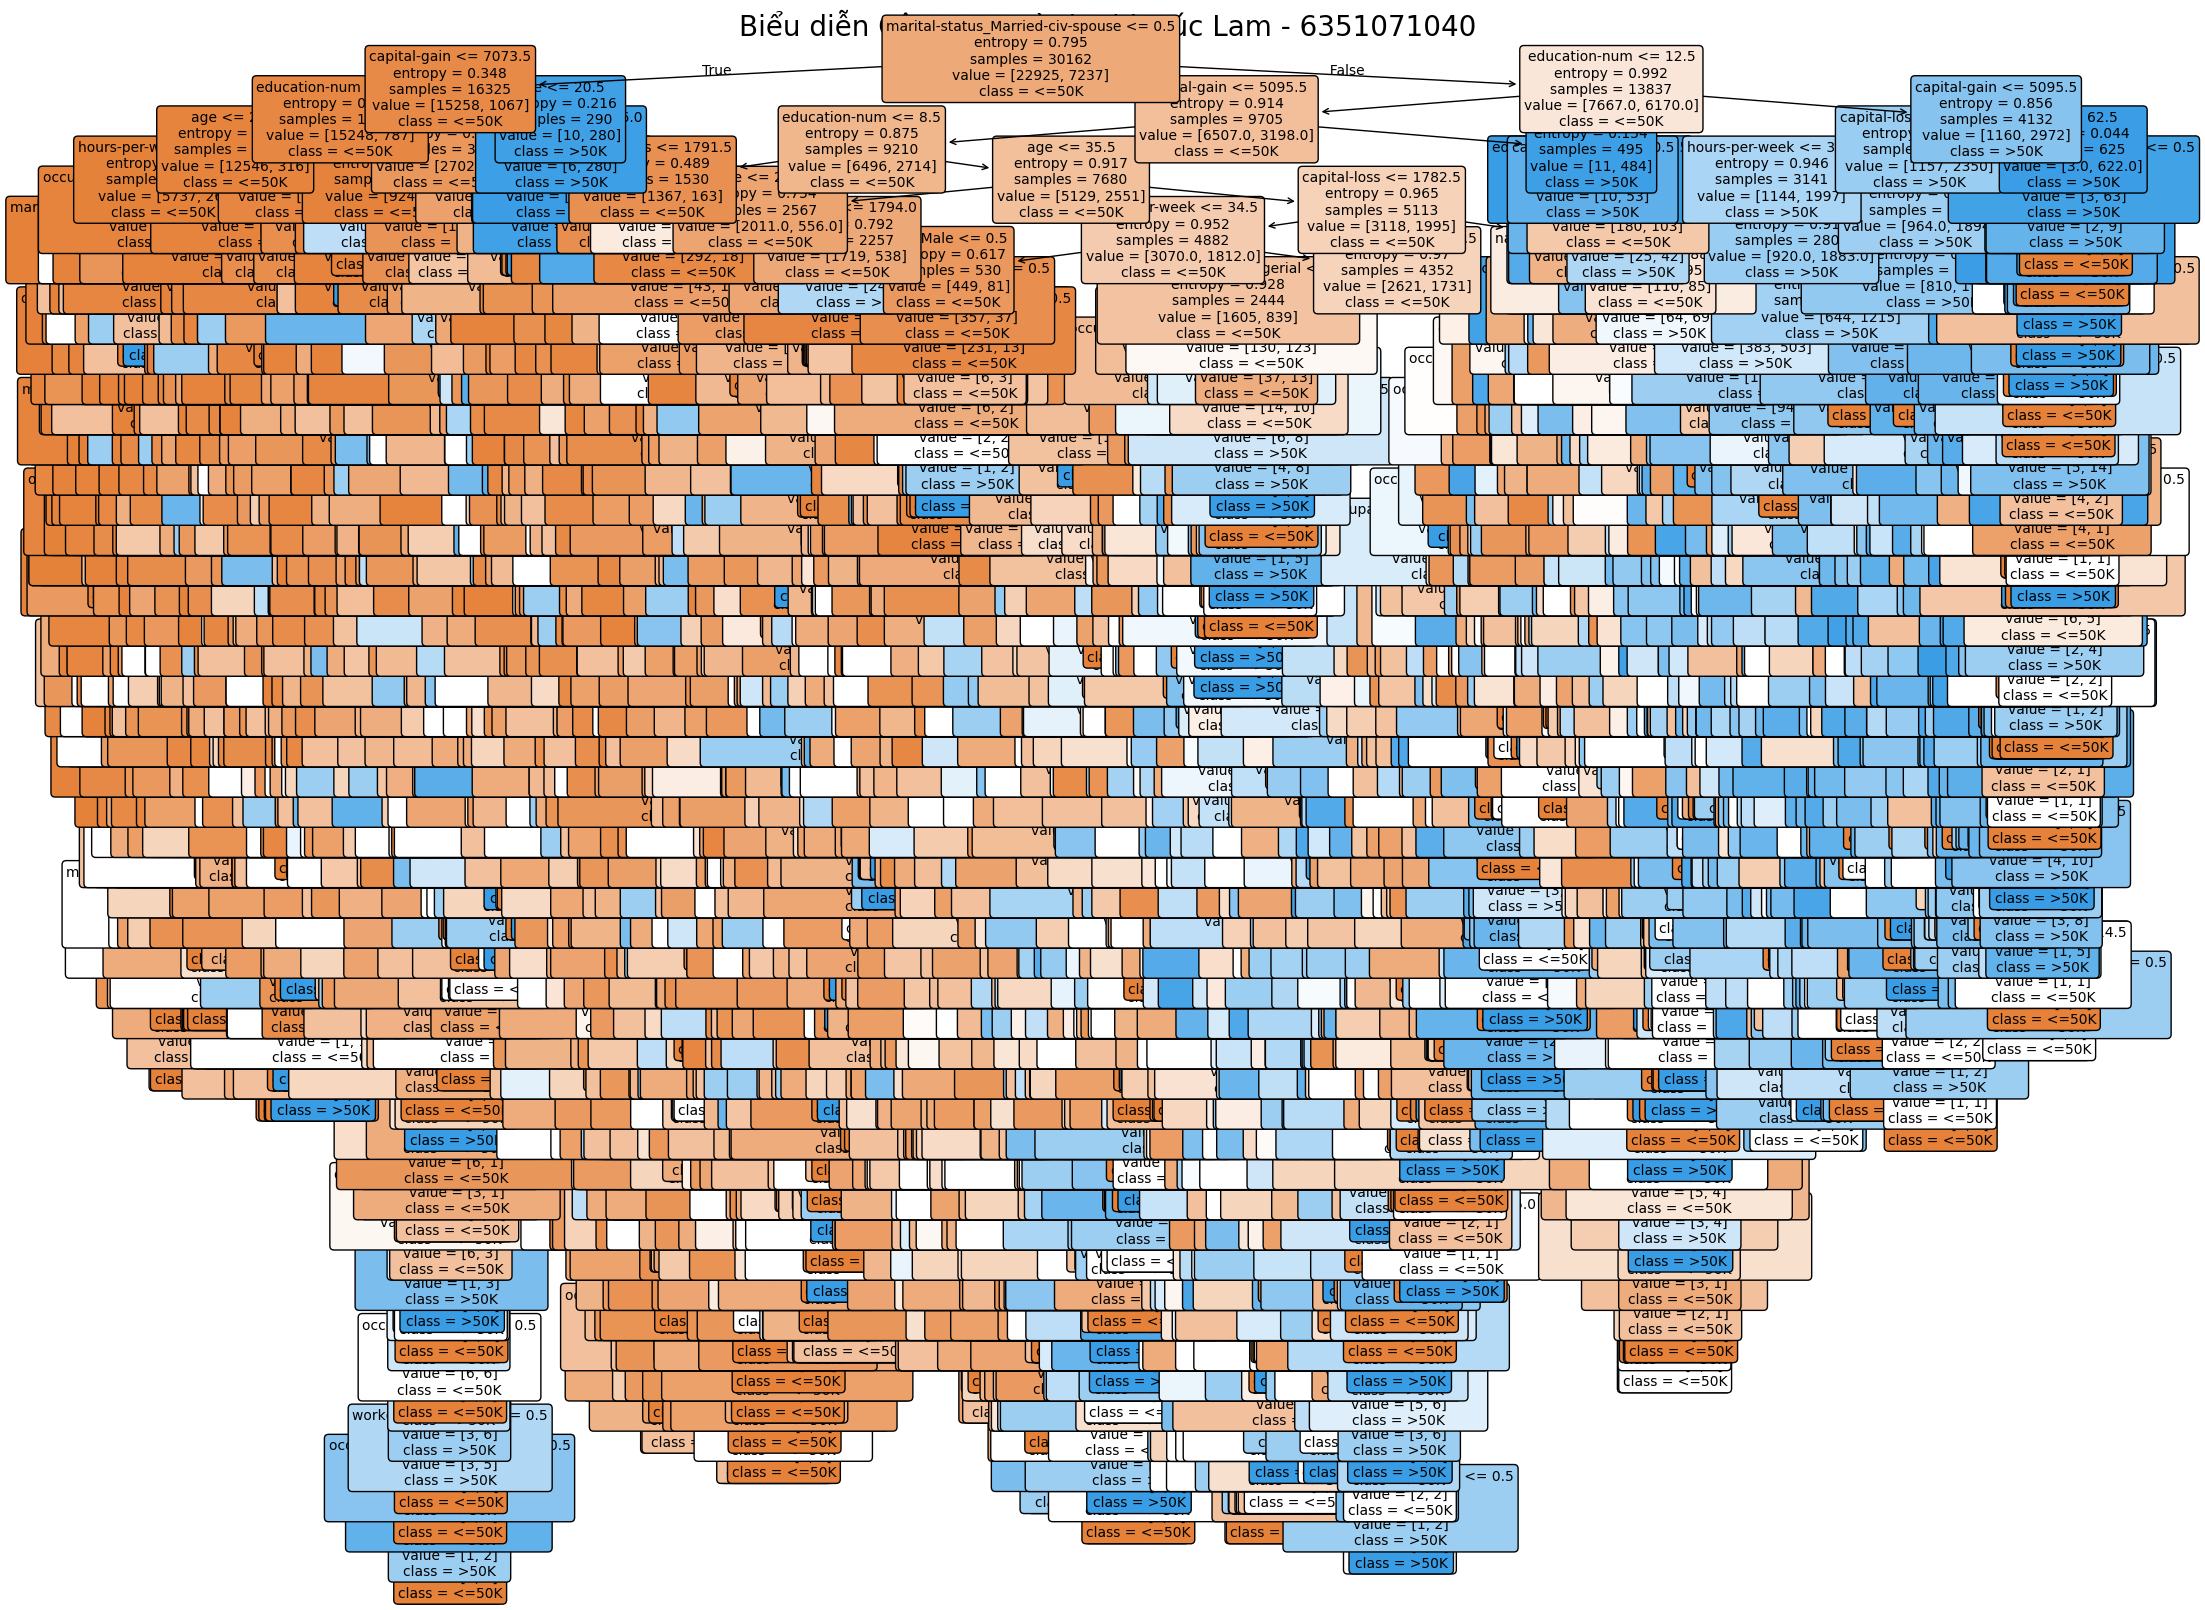

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,20))
plot_tree(model, filled=True, feature_names=X_train.columns, class_names=model.classes_,
          rounded=True, fontsize=10)
plt.title("Biểu diễn Cây ID3 Huỳnh Thị Trúc Lam - 6351071040", fontsize=20)
plt.show()


Huỳnh Thị Trúc Lam - 6351071040


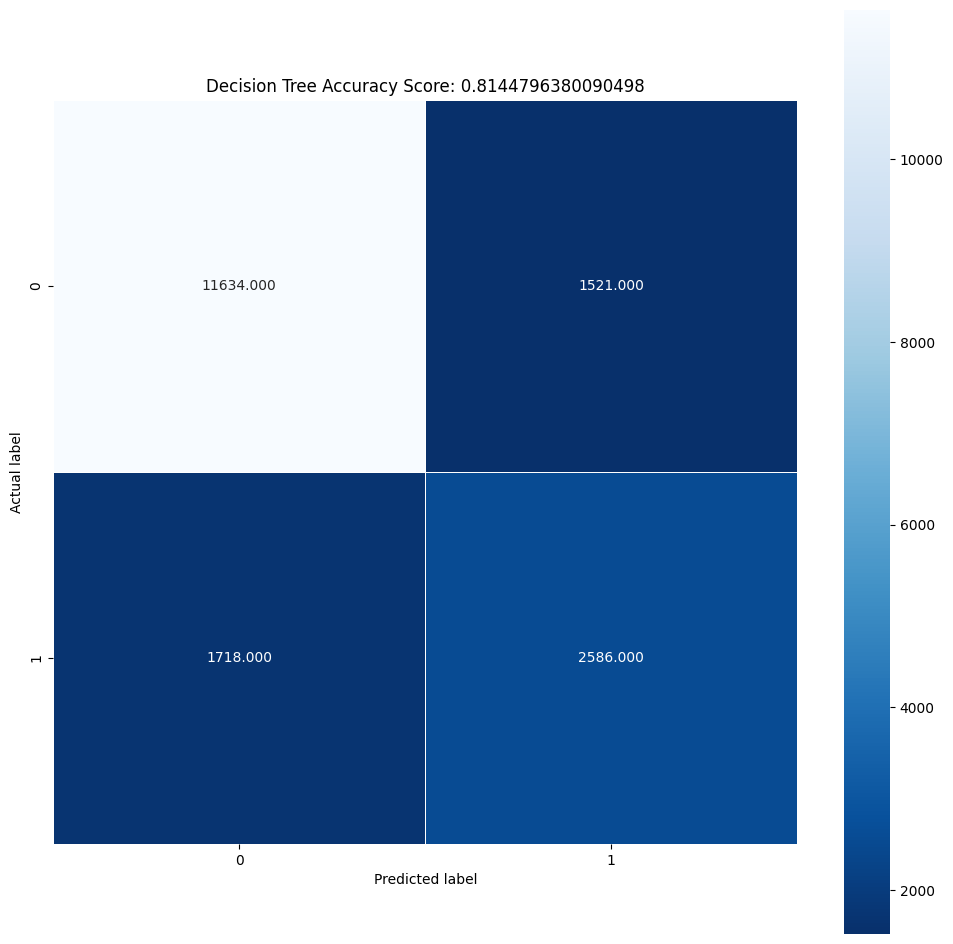

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"Decision Tree Accuracy Score: {accuracy_score(y_test, y_pred)}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print("\nHuỳnh Thị Trúc Lam - 6351071040")


**Yêu cầu 8:** Lặp lại yêu cầu 7 đối với cây CART.

In [ ]:
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42)
cart_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)


Huỳnh Thị Trúc Lam - 6351071040
Accuracy (CART):
0.8137350363709261
Report (CART):
              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88     13155
        >50K       0.63      0.61      0.62      4304

    accuracy                           0.81     17459
   macro avg       0.75      0.74      0.75     17459
weighted avg       0.81      0.81      0.81     17459

Confusion Matrix (CART):
[[11598  1557]
 [ 1695  2609]]


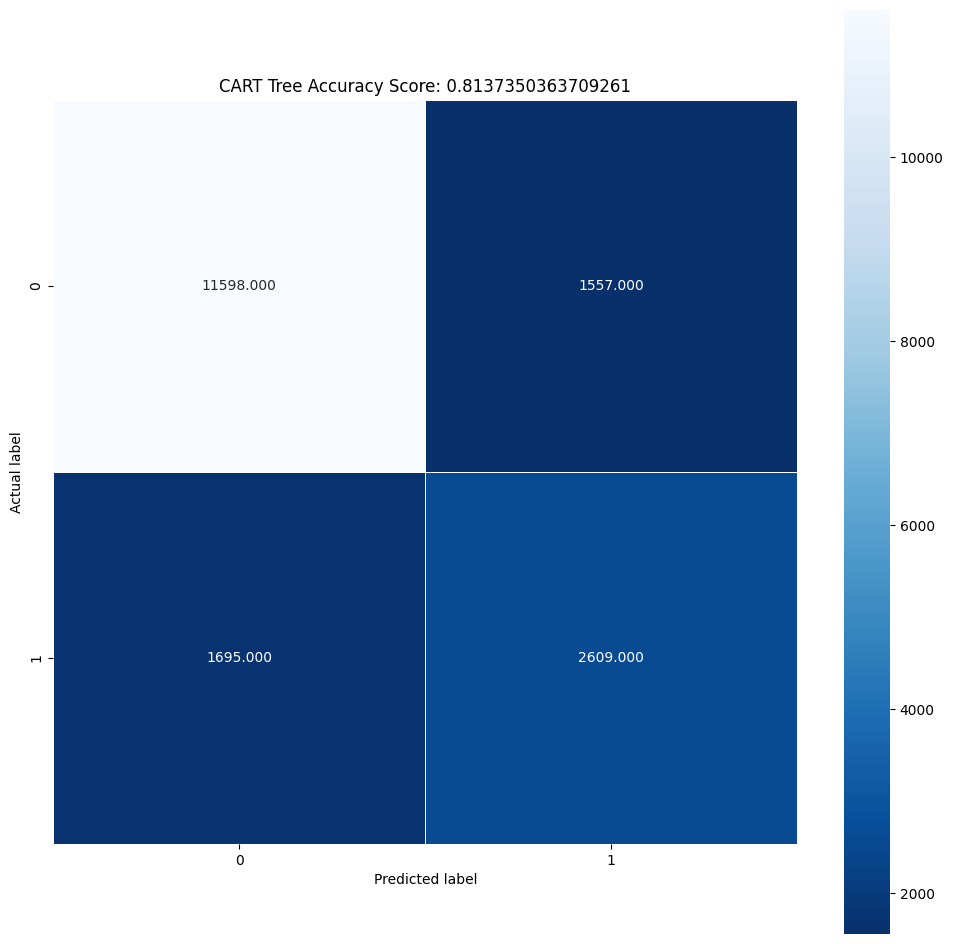

In [ ]:
print("\nHuỳnh Thị Trúc Lam - 6351071040")

# Dự đoán trên test
y_pred_cart = cart_model.predict(X_test)

# Độ chính xác
print("Accuracy (CART):")
print(accuracy_score(y_test, y_pred_cart))
print("Report (CART):")
print(classification_report(y_test, y_pred_cart))

# Ma trận nhầm lẫn
cm_cart = confusion_matrix(y_test, y_pred_cart)
print("Confusion Matrix (CART):")
print(cm_cart)

plt.figure(figsize=(12,12))
sns.heatmap(cm_cart, annot=True, fmt=".3f", linewidths=.5, square = True,cmap="Blues_r" )
plt.title(f"CART Tree Accuracy Score: {accuracy_score(y_test, y_pred_cart)}")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Yêu cầu 9:** Xây dựng mô hình phân lớp bằng thuật toán Naïve Bayes và kiểm tra kết quả đạt được. Đối với thuật toán Naïve Bayes, sinh viên cũng làm tương tự với câu lệnh

In [12]:
from sklearn.naive_bayes import GaussianNB

print("\nHuỳnh Thị Trúc Lam - 6351071040")

# Khởi tạo mô hình Naïve Bayes
nb_model = GaussianNB()

# Huấn luyện mô hình
nb_model.fit(X_train, y_train)

print("Naïve Bayes model trained successfully.")


Huỳnh Thị Trúc Lam - 6351071040
Naïve Bayes model trained successfully.



Huỳnh Thị Trúc Lam - 6351071040


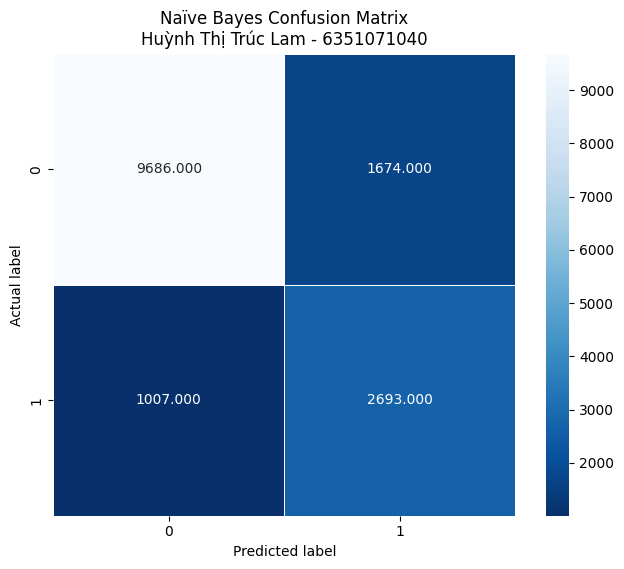

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\nHuỳnh Thị Trúc Lam - 6351071040")

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r")
plt.title("Naïve Bayes Confusion Matrix\nHuỳnh Thị Trúc Lam - 6351071040")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

**Yêu cầu 10** Dựa vào các thông tin đã thu được, sinh viên tự đưa ra nhận xét, so sánh kết quả của các mô hình trên.


### 1. Tổng quan hiệu suất các mô hình

| Mô hình       | Độ chính xác (Accuracy) | Precision (<=50K) | Recall (<=50K) | F1-Score (<=50K) | Precision (>50K) | Recall (>50K) | F1-Score (>50K) |
| :------------ | :---------------------- | :---------------- | :------------- | :--------------- | :--------------- | :------------ | :-------------- |
| **ID3**       | 0.8145                  | 0.87              | 0.88           | 0.88             | 0.63             | 0.60          | 0.61            |
| **CART**      | 0.8137                  | 0.87              | 0.88           | 0.88             | 0.63             | 0.61          | 0.62            |
| **Naïve Bayes** | **0.8220**              | **0.91**          | 0.85           | 0.88             | 0.62             | **0.73**      | **0.67**        |

*Lưu ý: Các giá trị được làm tròn để dễ so sánh.*

### 2. Nhận xét chi tiết

#### Mô hình ID3
*   **Độ chính xác:** 81.45%
*   **Ưu điểm:** Hiệu suất khá tốt đối với lớp `income <=50K` (lớp đa số) với Precision, Recall và F1-Score cao.
*   **Nhược điểm:** Hiệu suất tương đối thấp đối với lớp `income >50K` (lớp thiểu số), đặc biệt là Recall (60%), cho thấy mô hình bỏ lỡ nhiều trường hợp có thu nhập cao.
*   **Ma trận nhầm lẫn:** Có số lượng False Negatives (người có thu nhập >50K bị dự đoán là <=50K) cao (1718), đồng thời có số lượng False Positives (người có thu nhập <=50K bị dự đoán là >50K) thấp (1521) cho lớp >50K.

#### Mô hình CART
*   **Độ chính xác:** 81.37%
*   **Ưu điểm:** Tương tự ID3, mô hình CART cũng cho hiệu suất tốt trên lớp `income <=50K`.
*   **Nhược điểm:** Hiệu suất trên lớp `income >50K` cũng tương đối thấp, mặc dù Recall có cải thiện nhẹ so với ID3 (61%).
*   **Ma trận nhầm lẫn:** Tương tự ID3, có số lượng False Negatives cao (1695) và False Positives thấp (1557) cho lớp >50K.

#### Mô hình Naïve Bayes
*   **Độ chính xác:** **82.20%**
*   **Ưu điểm:**
    *   Đạt độ chính xác tổng thể cao nhất trong ba mô hình.
    *   **Vượt trội về Recall (73%) và F1-Score (67%) cho lớp `income >50K` (lớp thiểu số):** Điều này cho thấy mô hình Naïve Bayes có khả năng xác định đúng nhiều người có thu nhập cao hơn so với hai mô hình cây quyết định. Đây là một lợi thế quan trọng nếu việc phát hiện lớp thiểu số là mục tiêu chính.
    *   Precision cho lớp `income <=50K` là cao nhất (91%).
*   **Nhược điểm:** Recall cho lớp `income <=50K` hơi thấp hơn so với ID3 và CART (85% so với 88%), nghĩa là nó có thể bỏ lỡ một số trường hợp có thu nhập thấp.
*   **Ma trận nhầm lẫn:** Có số lượng False Negatives thấp nhất cho lớp >50K (1007), xác nhận khả năng bắt được lớp thiểu số tốt hơn. Tuy nhiên, số lượng False Positives cho lớp >50K hơi cao hơn (1674).

### 3. Kết luận và So sánh

*   **ID3 và CART** thể hiện hiệu suất rất giống nhau trên bộ dữ liệu này. Cả hai đều mạnh trong việc xác định lớp đa số (`<=50K`) nhưng yếu hơn trong việc nhận diện lớp thiểu số (`>50K`). Điều này có thể là do sự mất cân bằng lớp hoặc đặc điểm của thuật toán cây quyết định gặp khó khăn với các mẫu phức tạp của lớp thiểu số.
*   **Naïve Bayes** vượt trội về độ chính xác tổng thể và đặc biệt là khả năng **phát hiện lớp thiểu số (`>50K`)** với Recall và F1-Score cao hơn đáng kể. Mặc dù Precision cho lớp `>50K` hơi thấp hơn một chút so với các mô hình cây, nhưng sự cải thiện về Recall là rất đáng chú ý. Điều này ngụ ý rằng nếu mục tiêu kinh doanh là tối đa hóa việc xác định những người có thu nhập cao (ví dụ: cho các chiến dịch marketing mục tiêu), Naïve Bayes sẽ là lựa chọn ưu việt hơn.

**Tóm lại:**
*   Nếu yêu cầu chính là có một mô hình đơn giản, dễ giải thích và hoạt động tốt trên lớp đa số, **ID3 hoặc CART** có thể phù hợp.
*   Nếu ưu tiên hàng đầu là độ chính xác tổng thể cao hơn một chút và đặc biệt là khả năng **tối đa hóa việc phát hiện lớp thiểu số**, thì **Naïve Bayes** là lựa chọn tốt nhất trong số ba mô hình đã thử nghiệm.